
# Programming Assignment 5 - Linear Regression

---

## Boston Housing Dataset

Each instance in this dataset describes the attributes of a housing property in Boston suburb and the task is to predict the house prices in thousands of dollars. There are 13 numerical attributes with varying scales describing the housing properties of suburbs. The readme file in the dataset provides details on the dataset. Read this file before implementing your algorithm to check whether you need to do any data preprocessing steps. The 13 attributes of each property and the housing price (in $1000's) are given as follows:
1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town
4. CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per $10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000 (Bk - 0.63) ^ 2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's

`housing.data` contains the actual dataset.

**IMPORTANT**: you can assume that the last column will always contain the y values. However, your code will be tested against datasets of varying number of rows and columns, so do not hardcode (e.g. `[:13]`)

## Objective

You are to implement a linear regression algorithm using gradient descent to predict the price of a house given the details of the property. After completing this assignment, you should be familiar with the following:
1. Loading a dataset
2. Normalising a dataset
3. Splitting a dataset into training and testing set
4. Computing the RMSE between a predicted value and actual value
5. Implementing gradient descent to find optimal parameters
6. Applying linear regression with optimal parameters for prediction

### **Total Marks: 30**
---


## Downloading the Dataset and Importing Modules

You can follow the steps below to download the dataset and upload it to a Colab environment.
1. Download the dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data (save it as a text file)
2. Open the Colab file browser by pressing the small folder icon on the top left of the Colab page.  
3. Drag and drop the `housing.data` file into the Colab folder `/content/`.

We will be using `math` and `numpy` as `np` for the questions. **You do not need to import them when submitting on Coursemology.**

In [235]:
import math
import numpy as np

# to display the float numbers with 2 decimal points and supress the use of
# scientific notations for small numbers
## np.set_printoptions(precision=2, suppress=True)

---

### Q1 load_data (3 marks)

We first need to load the dataset from `housing.data` and store the relevant data in numpy arrays.

The function `load_data` takes in a **text** file `filename` and returns the numpy array `dataset`, containing the contents of the dataset as type **float**. Please **leave the rows and columns in the order that they appear** in the text file.

Tip: there's a numpy function that reads text files and converts their contents into arrays.

In [236]:
# Submit to Coursemology
def load_data(filename):
    '''
    filename: string, the path to the house.data file
    RETURN
        dataset: numpy array, shape = [N, 14]
    '''
    with open(filename[1:], 'rb') as f:
        dataset = np.loadtxt(f)
        # for line in f.readline():
        #     dataset.append(np.fromstring(line, sep=' '))
    ## start your code here
    
    
    ## end
    return dataset

In [237]:
# Testing

filename = "/content/housing.data" 
dataset = load_data(filename)

print(dataset.shape)
print(np.mean(dataset, axis=0))

(506, 14)
[3.61352356e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
 5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
 9.54940711e+00 4.08237154e+02 1.84555336e+01 3.56674032e+02
 1.26530632e+01 2.25328063e+01]


Expected output:
```
(506, 14)
[3.61352356e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
 5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
 9.54940711e+00 4.08237154e+02 1.84555336e+01 3.56674032e+02
 1.26530632e+01 2.25328063e+01]
```


---

### Q2 normalize (3 marks)

As per usual, we will now feature scale our data, but this time using normalisation. Each column in `dataset` needs to be normalized separately. That is, for each column, for each value, we subtract the minimum from that column and then divide by (max of column - min of column).

The function `normalize` takes in a `dataset` and returns the normalized dataset `dataset_normalized`. **The last column (i.e. the y values) should not be normalized**.

In [238]:
# Submit to Coursemology
def normalize(dataset):
    '''
    dataset: numpy array, shape = [N, D]
    RETURN
        dataset_normalized: numpy array, shape = [N, D]
    '''
    dataset_normalized = np.zeros_like(dataset)
    for col_idx in range(dataset.shape[1]-1):
        dataset_normalized[:, col_idx] = (dataset[:, col_idx] - np.min(dataset[:, col_idx])) / (np.max(dataset[:, col_idx]) - np.min(dataset[:, col_idx]))

    dataset_normalized[:, -1] = dataset[:, -1]
    ## start your code here
    
    
    ## end
    return dataset_normalized

In [239]:
# Testing

dataset_normalized = normalize(dataset)
print(dataset_normalized.shape)
print(np.mean(dataset_normalized,axis=0))

(506, 14)
[ 0.0405441   0.11363636  0.39137752  0.06916996  0.34916679  0.52186901
  0.67636355  0.24238128  0.37171335  0.42220831  0.62292911  0.89856783
  0.30140903 22.53280632]


Expected output:
```
(506, 14)
[ 0.0405441   0.11363636  0.39137752  0.06916996  0.34916679  0.52186901
  0.67636355  0.24238128  0.37171335  0.42220831  0.62292911  0.89856783
  0.30140903 22.53280632]
```

---

### Q3 add_bias (3 marks)

Now, we need to add a bias to each row for the linear regression to include the weight w0.

The function `add_bias` takes in a `dataset` and returns the dataset with an additional first column of bias 1 `dataset_ones` (i.e. with a R x C dataset, it should return a R x (C + 1) dataset with the leftmost column being all 1s).

In [240]:
# Submit to Coursemology
def add_bias(dataset):
    '''
    dataset: numpy array, shape = [N,D]
    RETURN
        dataset_ones: numpy array, shape = [N, D+1]
    '''
    dataset_ones = np.ones((dataset.shape[0], dataset.shape[1]+1))
    dataset_ones[:, 1:] = dataset[:, :]
    ## Start your code here
    

    ## end
    return dataset_ones

In [241]:
# Testing

dataset_ones = add_bias(dataset_normalized)
print(dataset_ones.shape)
print(dataset_ones[20])

(506, 15)
[ 1.          0.01399878  0.          0.28152493  0.          0.31481481
  0.38493964  0.98043254  0.24264111  0.13043478  0.22900763  0.89361702
  0.9487367   0.53228477 13.6       ]


Expected output:
```
(506, 15)
[ 1.          0.01399878  0.          0.28152493  0.          0.31481481
  0.38493964  0.98043254  0.24264111  0.13043478  0.22900763  0.89361702
  0.9487367   0.53228477 13.6       ]
```

---

### Q4 split_dataset (3 marks)

We have one last data manipulation to complete before training our model - splitting the dataset into a training set and a testing set.

The function `split_dataset` takes in a `dataset` and returns the training set comprising of arrays `train_X` and `train_y`, and the testing set comprising of arrays `test_X` and `test_y`. The training set is made up of the **first 80%** of the dataset whiled the testing set is made up of the remaining 20%. X refers to all the columns except the last one, and y refers to the last column.

Tip: `np.shape()` can be used to get the number of rows in the dataset.

In [242]:
# Submit to Coursemology
def split_dataset(dataset):
    '''
    dataset: numpy array, shape = [N, D]
    RETURN
        train_X: numpy array, shape = [int(N * 0.8), D-1]
        test_X: numpy array, shape = [N-int(N * 0.8), D-1]
        train_y: numpy array, shape = [int(N * 0.8), 1]
        test_y: numpy array, shape = [N-int(N * 0.8), 1]
    '''
    r, c = dataset.shape
    train_r = int(0.8*r)
    train_X, test_X = dataset[:train_r, :c-1], dataset[train_r:, :c-1]
    train_y, test_y = dataset[:train_r, -1].reshape(-1, 1), dataset[train_r:, -1].reshape(-1, 1)
    ## start your code here
    
    
    ## end 
    return train_X, test_X, train_y, test_y

In [243]:
# Testing

train_X, test_X, train_y, test_y = split_dataset(dataset_ones)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(404, 14) (102, 14) (404, 1) (102, 1)


Expected output:
```
(404, 14) (102, 14) (404, 1) (102, 1)
```

---

### Q5 model (2 marks)

We can start to build our linear regression model.

For a dataset with N rows and D columns, the function `model` takes in n array of x values `X` (of shape N x D) and an array of weights `W` (of shape D x 1) and returns an array of predicted values for each data sample `prediction` (of shape N x 1).

In [244]:
# Submit to Coursemology
def model(X, W):
    '''
    X: numpy array, shape = [N, D]
    W: numpy array, shape = [D, 1]
    RETURN
        prediction: numpy array, shape = [N, 1]
    '''
    prediction = np.matmul(W,X)
    ## start your code here
    
    
    ## end
    return prediction

In [245]:
# Testing

y_hat = model(np.zeros((dataset.shape[1],1)), dataset_ones[:,:-1])
print(y_hat.shape)

(506, 1)


Expected output:
```
(506, 1)
```

---

### Q6 mse_function (3 marks)

We need a loss function as a metric for our gradient descent to determine how well our model is doing.

The function `mse_function` takes in an array of actual y values `y` and an array of predicted y values `y_hat` and returns an array of mean squared error (MSE) `loss`. This function **should not use loops** as it can be done directly through array operations.

Tip: `np.dot()` can be used for matrix multiplication.

In [265]:
# Submit to Coursemology
def mse_function(y_hat, y):
    '''
    y_hat: numpy array, shape = [N, 1]
    y: numpy array, shape = [N, 1]
    RETURN
        loss: float value
    '''
    loss = np.mean(np.power(y_hat-y, 2))
    ## start your code here
    
    
    ## end 
    return loss

When you run this code, you should get the expected output as shown below:

In [266]:
# Testing

N = dataset_ones.shape[1]
print(mse_function(y_hat,dataset_ones[:,-1:]))

592.1469169960474


Expected output:
```
592.1469169960474
```

---

### Q7 gradient (4 marks)

The next step is to produce our gradients so that we can update our weights. This can be done in the following steps:
1. Compute y_hat (of shape R x 1)
2. Compute difference between y_hat and actual y
3. Multiply X by the difference in step 2
4. Divide by number of rows N to get gradient

The function `gradient` takes in x values `X` (of shape N x D), weights `W` (of shape D x 1),  and y values `y` (of shape N x 1) and returns an array of gradients for each weight `grad`. Return values to the **nearest 6 decimal places using `round()`**.

In [296]:
# Submit to Coursemology
def gradient(X, W, y):
    '''
    X: numpy array, shape = [N, D]
    W: numpy array, shape = [D, 1]
    y: numpy array, shape = [N, 1]
    RETURN
        grad: numpy array, shape = [D, 1]
    '''
    y_hat = np.dot(X,W)
    loss = y-y_hat
    temp = X * loss
    grad = np.sum((1/X.shape[0]) * temp, axis=0).reshape(W.shape[0], 1)
    return grad

In [297]:
# Testing

resultlist = gradient(np.array([[1,2,3],[3,4,5]]),np.array([[5],[2],[1]]),np.array([[2],[1]])).tolist()
print(resultlist)

[[-45.5], [-64.0], [-82.5]]



Expected output:
```
[[-45.5], [-64.0], [-82.5]]
```



---

### Q8 gradient_descent (3 marks)

With everything else settled, we can create our gradient descent function.

The function `gradient_descent` takes in the training data `train_X` and `train_y`, the testing data `test_X` and `test_y`, the learning rate `L` and the number iterations to run `num_iter`. It returns the array of optimal parameters `best_W` and the a dictionary tracking the training data loss and testing data loss `loss_history`.

You only need to implement the updating of weights in each iteration as given in the following steps:
1. Predict y values using the weights `W` and x values `train_X` (remember to use only the **training data**)
2. Calculate the gradient of the loss function
3. Update the weights `W`

A correct implementation of `gradient` has been given to you in Coursemology (i.e. you don't need to code it again)

In [300]:
# Submit to Coursemology
def gradient_descent(train_X, train_y, test_X, test_y, L, num_iter):  
    '''
    train_X: numpy array, shape = [N_train, D]
    test_X: numpy array, shape = [N_test, D]
    train_y: numpy array, shape = [N_train, 1]
    test_y: numpy array, shape = [N_test, 1]
    L: float value
    num_iter: int value
    RETURN
        best_W: numpy array, shape = [D, 1]
        loss_history: numpy array, shape = [2, num_iter]
    '''
    N_train, D = train_X.shape # number of training samples, number of features
    W = np.zeros((D,1)) # the parameters of the linear regression model
    best_W = None # the optimized parameters on the training data 

    # record loss of each iteration - both rmse between training data and target
    # data as well as between testing data and target data.
    loss_history = { 'train': [], 'test': [] }

    # Gradient descent steps
    for i in range(num_iter): 
        ## start your code here
        W = W + L * gradient(train_X, W,train_y)
        ## end of your code

        train_y_hat = model(W, train_X)
        test_y_hat = model(W, test_X)
        
        train_loss = mse_function(train_y_hat, train_y)
        test_loss = mse_function(test_y_hat, test_y)

        if len(loss_history['test']) > 0 and test_loss < loss_history['test'][-1]: # better test loss
            best_W = np.copy(W) # store the optimal parameter
        
        loss_history['train'].append(train_loss)
        loss_history['test'].append(test_loss)

    return best_W, loss_history

In [301]:
# Testing

best_W, loss_history = gradient_descent(train_X, train_y, test_X, test_y, 0.01, 5000)
print(best_W.T)
print(mse_function(model(best_W, test_X), test_y))

[[ 9.93008179 -1.09184095  4.62616462 -1.4178688   3.02227804 -0.43412238
  11.71497134  1.5884702   2.62489101 -0.92561114 -1.72612043 -1.62906862
   9.52457346 -5.8227015 ]]
17.167879004711903



Expected output:

```
[[ 9.93008179 -1.09184095  4.62616462 -1.4178688   3.02227804 -0.43412238
  11.71497134  1.5884702   2.62489101 -0.92561114 -1.72612043 -1.62906862
   9.52457346 -5.8227015 ]]
17.167879004711896
```

**Bonus: plotting the learning curve**

When you run the following code, you should get something similar to the graph shown below:

![graph image here (LRGDgrph1.png)](https://drive.google.com/uc?export=view&id=1-MJzt4mKpwUYHYGfSkmdcqnQdZF6rs7a)

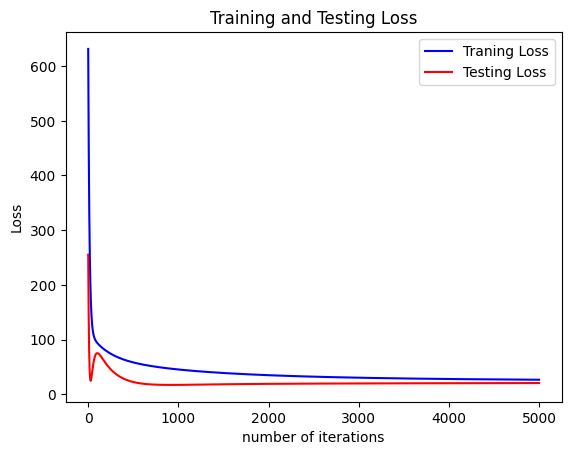

In [302]:
# Plot the learning curve
import matplotlib.pyplot as plt

x_values = range(1,len(loss_history['train'])+1)
plt.plot(x_values, loss_history['train'], 'b', label="Traning Loss")
plt.plot(x_values, loss_history['test'], 'r', label="Testing Loss")
plt.title("Training and Testing Loss")
plt.xlabel("number of iterations")
plt.ylabel("Loss")
plt.legend()

plt.show()

---

### Q9 Prediction using the Linear Regression Model (2 marks)

Let's test our linear regression model.

Given new data `new_X` and the optimal parameters `best_W` (from Q8), use the `model` function from Q5 to predict the price. A correct implementation of `model` has been given to you in Coursemology (i.e. you don't need to code it again)

In [303]:
# the test data below is already normalzied
new_dataset = np.asarray([[1.000,0.001,0.125,0.272,0.000,0.286,0.470,0.656,0.403,0.174,0.237,0.277,0.997,0.295,22.900],
[1.000,0.002,0.000,0.236,0.000,0.130,0.426,0.313,0.361,0.087,0.088,0.564,1.000,0.343,20.000],
[1.000,0.001,0.125,0.206,0.000,0.049,0.390,0.349,0.488,0.130,0.302,0.670,1.000,0.313,17.400],
[1.000,0.001,0.000,0.148,0.000,0.132,0.588,0.548,0.301,0.087,0.115,0.628,0.988,0.132,26.600],
[1.000,0.001,0.000,0.297,0.000,0.278,0.492,0.848,0.090,0.174,0.376,0.883,0.977,0.341,20.400],
[1.000,0.004,0.000,0.786,0.000,0.492,0.555,0.989,0.090,0.130,0.477,0.915,0.995,0.300,19.200],
[1.000,0.021,0.000,0.701,1.000,0.453,0.813,0.981,0.083,0.174,0.412,0.223,0.982,0.005,35.000],
[1.000,0.001,0.000,0.073,0.000,0.212,0.391,0.895,0.169,0.087,0.011,0.553,0.985,0.338,26.400],
[1.000,0.003,0.000,0.371,0.000,0.214,0.530,0.511,0.293,0.130,0.172,0.638,0.995,0.255,24.400],
[1.000,0.005,0.000,0.210,0.000,0.245,0.573,0.191,0.204,0.304,0.229,0.511,0.958,0.056,31.500],
[1.000,0.004,0.000,0.346,0.000,0.327,0.541,0.662,0.219,0.130,0.223,0.617,0.996,0.238,23.100],
[1.000,0.001,0.000,0.102,0.000,0.154,0.442,0.236,0.371,0.130,0.464,0.457,0.964,0.227,19.300],
[1.000,0.000,0.850,0.135,0.000,0.091,0.566,0.255,0.673,0.130,0.313,0.564,0.989,0.128,23.100],
[1.000,0.043,0.000,0.647,0.000,0.792,0.515,0.908,0.106,1.000,0.914,0.809,0.883,0.344,19.900],
[1.000,0.125,0.000,0.647,0.000,0.582,0.258,1.000,0.004,1.000,0.914,0.809,1.000,0.912,13.800],
[1.000,0.103,0.000,0.647,0.000,0.648,0.378,1.000,0.041,1.000,0.914,0.809,1.000,0.603,11.300],
[1.000,0.097,0.000,0.647,0.000,0.634,0.504,0.924,0.060,1.000,0.914,0.809,1.000,0.371,13.800],
[1.000,0.108,0.000,0.647,0.000,0.634,0.545,1.000,0.046,1.000,0.914,0.809,0.948,0.513,12.100],
[1.000,0.211,0.000,0.647,0.000,0.436,0.204,1.000,0.039,1.000,0.914,0.809,0.072,0.901,20.900],
[1.000,0.083,0.000,0.647,0.000,0.605,0.504,0.774,0.073,1.000,0.914,0.809,0.243,0.546,11.000]]
)

new_X = new_dataset[:,:-1]
new_y = new_dataset[:,-1:]

In [304]:
# Submit to Coursemology
predicted_y = model(best_W, new_X)
## start your code here

## end

print(predicted_y)

[[24.36024917]
 [22.34836515]
 [22.56704338]
 [25.55041309]
 [21.80564756]
 [22.20258111]
 [31.127792  ]
 [22.59253409]
 [23.63320466]
 [24.36141296]
 [23.84767426]
 [22.43844523]
 [29.52878713]
 [18.96171354]
 [13.63808166]
 [16.93558238]
 [19.70431347]
 [18.93449087]
 [ 4.29207349]
 [11.29896697]]


Expected output:

```
[[24.36024917]
 [22.34836515]
 [22.56704338]
 [25.55041309]
 [21.80564756]
 [22.20258111]
 [31.127792  ]
 [22.59253409]
 [23.63320466]
 [24.36141296]
 [23.84767426]
 [22.43844523]
 [29.52878713]
 [18.96171354]
 [13.63808166]
 [16.93558238]
 [19.70431347]
 [18.93449087]
 [ 4.29207349]
 [11.29896697]]
```

---

### Q10 Calculating MSE (1 mark)

Given our predicted y values `predicted_y` and the actual y values `new_y`, use the `mse_function` from Q6 to calculate the MSE of our predictions. A correct implementation of `mse_function` has been given to you in Coursemology (i.e. you don't need to code it again)

In [305]:
# Submit to Coursemology
mse_loss = mse_function(predicted_y, new_y)
## Start your code here

## end

print(mse_loss)

28.468249030219898


Expected output:

```
28.468249030219887
```

**Bonus: plotting the actual y values vs the predicted y values**

When you run the following code, you should get something similar to the graph shown below:

![graph image here (LRGDgrph2.png)](https://drive.google.com/uc?export=view&id=16jCCxZe2nNhsDllafNwpbMd93cy-MSgv)

In [ ]:
#plot the graph showing the predictedy  values and the actual y values
x_values = range(1,predicted_y.shape[0]+1)
plt.plot(x_values, new_y, 'b', label="actual - y")
plt.plot(x_values, predicted_y, 'r', label="predicted - y")
plt.title("Actual-y and predicted-y values")
plt.xlabel("Test data sample")
plt.ylabel("Housing Price in 1000's")
plt.legend()
plt.show()

---

## Q11 Reflection (3 marks)

In this question, list out the difficulties and how you overcome them when doing the assignment. You can also talk about what you have learned and how do you think we should improve the assignment here. Please list your comments in bullet points. **This section is graded**. Note that you won't get a mark when you submit this question, but you will automatically be awarded the full mark when finalising submission (subject to manual marking afterwards)

Please enter your comments here by double-clicking on this text cell:
* comment 1
* comment 2
* etc.


---

# End of Assignment